In [6]:
import ncvis
import numpy as np
import pandas as pd
import inspect

%matplotlib notebook

from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [3]:
# paths to the isomap projected database and the pivot table (to take the masks for coloring databases)

paths = [
    "./isomap_o_dim5.csv",
    "./pivot_o.csv"
]

In [4]:
# load dataset with isomap projected data, pca projected is not recommended beacuse of the high computational cost 

dataset = np.genfromtxt(paths[0], delimiter=';')

In [7]:
# add databases names to convert them into colors

color_info = pd.read_csv(paths[1], delimiter = ';', low_memory=False)

In [8]:
# insert column for colors

color_info.insert(1, "color", True)

In [15]:
# copy the names to that column

color_info["color"] = color_info["Unnamed: 0"]

In [16]:
# function to convert names to colors. Suffix information is enough. Each database has specific color

def check(name) :
    if (name.startswith("103")) :
        return 'b' #'AGP' 
    elif (name.startswith("EP")) :
        return 'r' # 'PTB' 
    elif (name.startswith("HMP2_") or (name.startswith("otu"))) :
        return 'g' # 'T2D'
    else :
        return 'y' # 'IBD'

In [17]:
# apply coloring to the full dataset

color_info["color"] = color_info["color"].apply(check)

In [18]:
# Check that the databases are marked properly

color_info["color"].value_counts()

b    9511
r    3457
g    1044
y      86
Name: color, dtype: int64

In [19]:
# initialize NCVis parameteres

vis = ncvis.NCVis(distance='euclidean')

In [20]:
# fit the data and get the embedding

embedded = vis.fit_transform(dataset)

In [21]:
# store the data to the csv file

np.savetxt("ncvis_o_dim2.csv", embedded, delimiter=";")

<IPython.core.display.Javascript object>


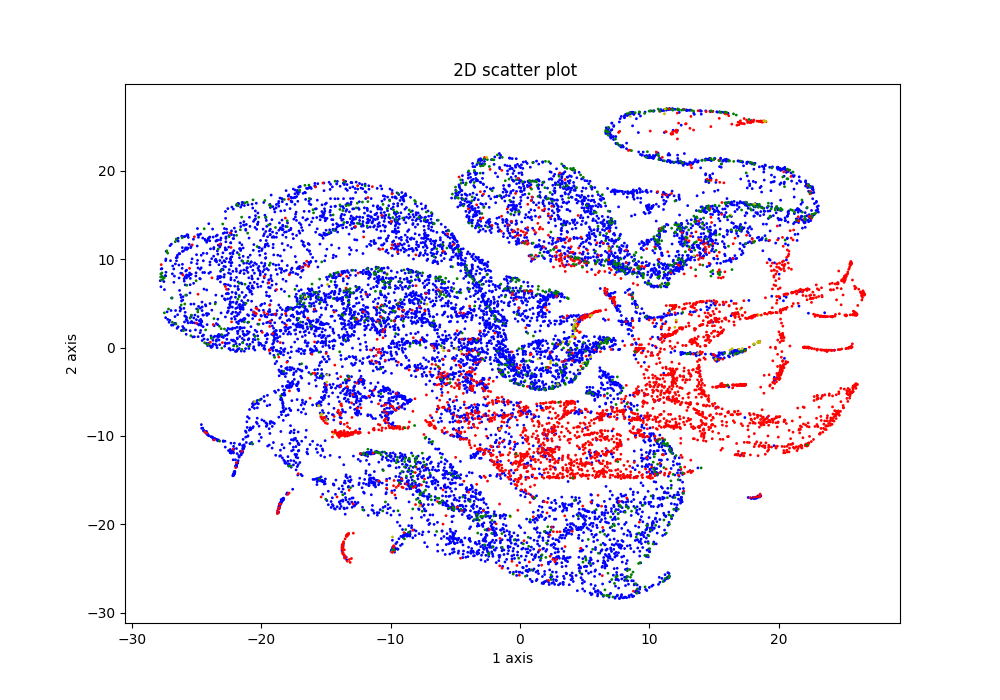

In [22]:
# plot the colored data
# distance='euclidean'

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedded[:, 0], embedded[:, 1], color = color_info["color"], s=1)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


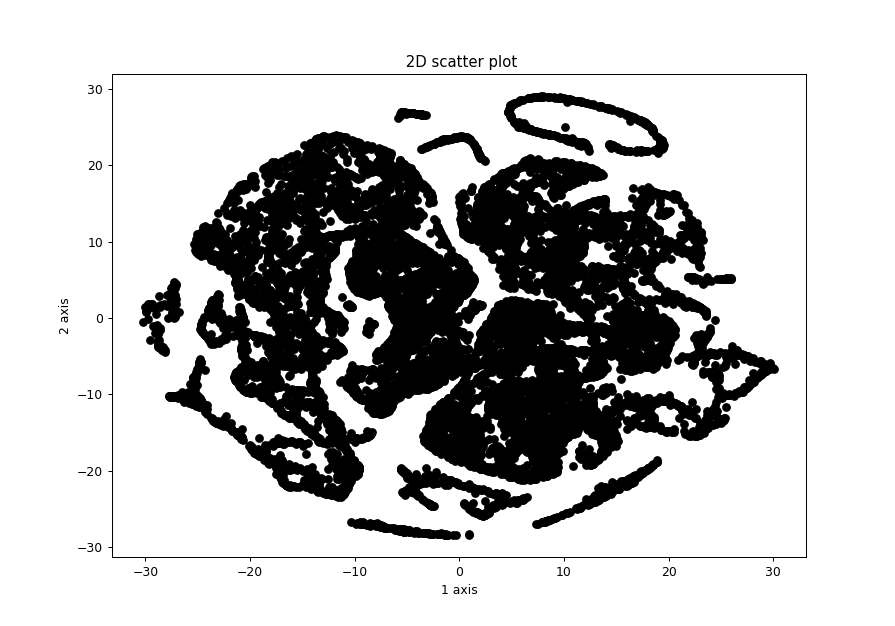

In [14]:
# distance = 'correlation'

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedded[:, 0], embedded[:, 1], color = "black")
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


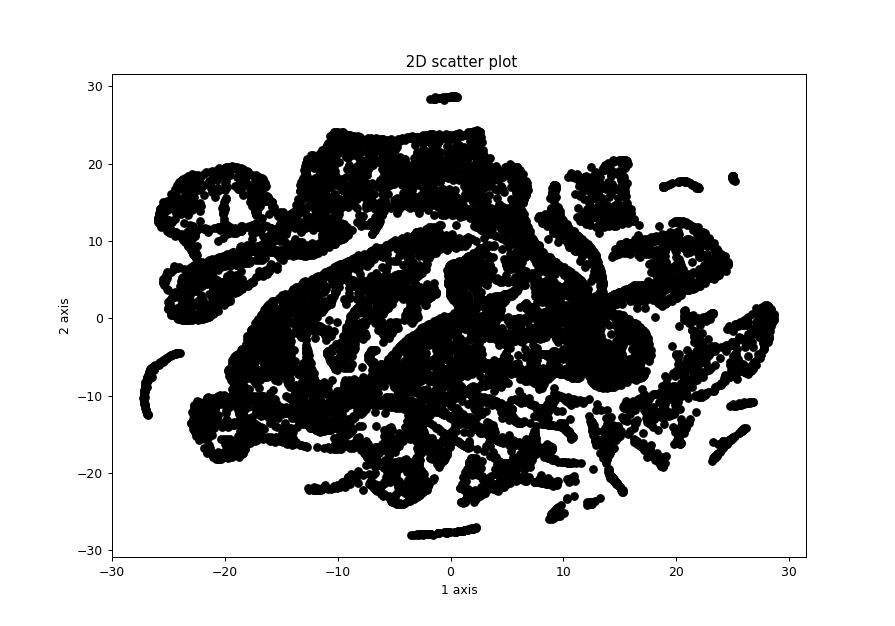

In [17]:
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedded[:, 0], embedded[:, 1], color = "black")
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


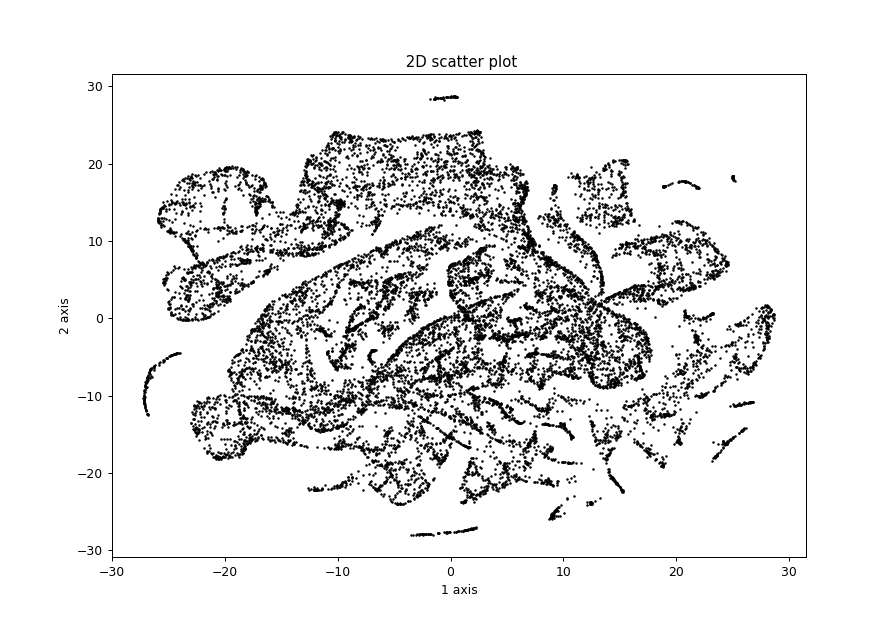

In [27]:
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedded[:, 0], embedded[:, 1], color = "black", s=1)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()